In [1]:
import sys
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../../')
sys.path.append('../preprocess')
from ranewable.ranewable import Ra
import preprocess_gefcom2014_solar_example

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


## Load json

In [2]:
params_path = '../params/params_gefcom2014_solar_example.json'
with open(params_path, 'r', encoding='utf-8') as file:
    params_json = json.loads(file.read())

In [3]:
params_json

{'trial_name': 'trial20',
 'trial_comment': 'Only using radiation VAR169.',
 'path_result': './result/gefcom2014-solar/',
 'path_raw_data': './data/gefcom2014/raw/',
 'filename_raw_data': 'gefcom2014-solar-raw.csv',
 'path_preprocessed_data': './data/gefcom2014/preprocessed/',
 'filename_preprocessed_data': 'gefcom2014-solar-preprocessed.csv',
 'data_resolution': '60min',
 'site_coords': [[145, -37, 5], [145, -37, 5], [145, -37, 5]],
 'site_altitude': [595, 602, 951],
 'site_capacity': [1, 1, 1],
 'panel_orientation': [38, 327, 31],
 'panel_tilt': [36, 35, 21],
 'splits': {'train': [['2012-04-01 01:00:00', '2013-04-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-05-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-06-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-07-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-08-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-09-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-10-01 00:00:00'],
   ['2012-04-01 01:00:00', '2013-11-01 00:00:00'],
   ['

## Load data

In [4]:
df = preprocess_gefcom2014_solar_example.load_data('.'+params_json['path_raw_data'], params_json['filename_raw_data'], header=[0,1])

In [5]:
df.head()

ZONEID,1,2,3,1,2,3,1,2,3,1,...,3,1,2,3,1,2,3,1,2,3
,POWER,POWER,POWER,VAR134,VAR134,VAR134,VAR157,VAR157,VAR157,VAR164,...,VAR178,VAR228,VAR228,VAR228,VAR78,VAR78,VAR78,VAR79,VAR79,VAR79
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2012-04-01 01:00:00,0.754103,0.647328,0.799000,94843.6250,94290.6250,92667.6250,60.221909,57.374252,57.003159,0.244601,...,2901861.0,0.000000,0.000000,0.000000,0.001967,0.001479,0.003531,0.003609,0.005444,0.024673
2012-04-01 02:00:00,0.555000,0.621822,0.817500,94757.9375,94217.6875,92622.6875,54.678604,57.129776,64.960831,0.457138,...,5980930.0,0.000000,0.000000,0.000774,0.005524,0.018304,0.027482,0.033575,0.101553,0.140474
2012-04-01 03:00:00,0.438397,0.472692,0.571500,94732.8125,94201.0625,92598.8125,61.294891,63.076141,66.795868,0.771429,...,8822632.0,0.001341,0.001256,0.001671,0.030113,0.035255,0.032356,0.132009,0.112935,0.136617
2012-04-01 04:00:00,0.145449,0.098866,0.063775,94704.0625,94156.0625,92542.0625,67.775284,62.975479,65.177628,0.965866,...,11178847.0,0.002501,0.001726,0.002084,0.057167,0.064514,0.031952,0.110645,0.107761,0.097370
2012-04-01 05:00:00,0.111987,0.104393,0.103700,94675.0000,94124.2500,92508.0000,70.172989,65.053848,65.744278,0.944669,...,13079958.0,0.003331,0.002093,0.002534,0.051027,0.059495,0.048494,0.189560,0.157593,0.163773


## Convert to standard indexing

In [6]:
df.index.name = 'valid_datetime'
idx_ref_datetime = df.index.hour == 1
df.loc[idx_ref_datetime, 'ref_datetime'] = df.index[idx_ref_datetime]
df.loc[:, 'ref_datetime'] = df.loc[:, 'ref_datetime'].fillna(method='ffill')
df = df.set_index('ref_datetime', append=True, drop=True)[df.columns.levels[0][:-1]]
df.index = df.index.reorder_levels(['ref_datetime', 'valid_datetime'])
df = df.sort_index()
columns = [df.columns.levels[0][:-1].values, df.columns.levels[1][:-1].values]
df.columns = pd.MultiIndex.from_product(columns)

In [7]:
df.head(50)

1                          \
                                            POWER      VAR134      VAR157   
ref_datetime        valid_datetime                                          
2012-04-01 01:00:00 2012-04-01 01:00:00  0.754103  94843.6250   60.221909   
                    2012-04-01 02:00:00  0.555000  94757.9375   54.678604   
                    2012-04-01 03:00:00  0.438397  94732.8125   61.294891   
                    2012-04-01 04:00:00  0.145449  94704.0625   67.775284   
                    2012-04-01 05:00:00  0.111987  94675.0000   70.172989   
                    2012-04-01 06:00:00  0.057244  94676.9375   72.374039   
                    2012-04-01 07:00:00  0.088718  94708.0625   81.798737   
                    2012-04-01 08:00:00  0.030064  94748.8125   87.854065   
                    2012-04-01 09:00:00  0.000128  94785.8125   88.793488   
                    2012-04-01 10:00:00  0.000000  94817.7500   90.450668   
                    2012-04-01 11:00:00  0.000000  94847.3750   90.676178   
                    2012-04-01 12:00:00  0.000000  94852.0625   92.928909   
                    2012-04-01 13:00:00  0.000000  94810.6250   94.989517   
                    2012-04-01 14:00:00  0.000000  94758.1250   94.810333   
                    2012-04-01 15:00:00  0.000000  94730.3750   95.559967   
                    2012-04-01 16:00:00  0.000000  94721.5625   99.391953   
                    2012-04-01 17:00:00  0.000000  94707.7500   99.679733   
                    2012-04-01 18:00:00  0.000000  94699.6875  100.207092   
                    2012-04-01 19:00:00  0.000000  94733.3125   99.531464   
                    2012-04-01 20:00:00  0.000000  94749.8125   99.423080   
                    2012-04-01 21:00:00  0.006346  94769.0000   98.573013   
                    2012-04-01 22:00:00  0.071538  94787.9375   92.123108   
                    2012-04-01 23:00:00  0.229167  94775.2500   82.745255   
                    2012-04-02 00:00:00  0.346474  94736.1250   71.751297   
2012-04-02 01:00:00 2012-04-02 01:00:00  0.656859  94746.8125   69.933548   
                    2012-04-02 02:00:00  0.771410  94678.8750   65.649643   
                    2012-04-02 03:00:00  0.613782  94608.3750   60.074112   
                    2012-04-02 04:00:00  0.554808  94533.6875   54.512299   
                    2012-04-02 05:00:00  0.458910  94505.9375   51.137894   
                    2012-04-02 06:00:00  0.198269  94503.8125   48.856094   
                    2012-04-02 07:00:00  0.085064  94518.3125   54.097427   
                    2012-04-02 08:00:00  0.011474  94576.5625   61.205093   
                    2012-04-02 09:00:00  0.000128  94605.3750   69.004196   
                    2012-04-02 10:00:00  0.000000  94615.6250   75.616730   
                    2012-04-02 11:00:00  0.000000  94632.0625   81.175858   
                    2012-04-02 12:00:00  0.000000  94596.3750   85.850693   
                    2012-04-02 13:00:00  0.000000  94592.4375   88.476013   
                    2012-04-02 14:00:00  0.000000  94570.8750   89.452911   
                    2012-04-02 15:00:00  0.000000  94567.5625   89.747833   
                    2012-04-02 16:00:00  0.000000  94550.3125   91.045074   
                    2012-04-02 17:00:00  0.000000  94505.2500   92.861114   
                    2012-04-02 18:00:00  0.000000  94501.5000   94.401443   
                    2012-04-02 19:00:00  0.000000  94527.5000   94.462448   
                    2012-04-02 20:00:00  0.000000  94541.9375   93.768936   
                    2012-04-02 21:00:00  0.015000  94569.3750   91.512985   
                    2012-04-02 22:00:00  0.086282  94632.7500   81.695084   
                    2012-04-02 23:00:00  0.315256  94631.3125   75.529312   
                    2012-04-03 00:00:00  0.514551  94624.6250   73.051941   
2012-04-03 01:00:00 2012-04-03 01:00:00  0.734615  94711.4375   63.741364   
                    2012-04-03 02:00:00  0.6

## Preprocess data (feature engineering)

### Average point features

In [8]:
# Average point features over hour
features_point = ['VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166', 'VAR167', 'VAR78', 'VAR79']
df_point = df.loc[:,(slice(None),features_point)]
df_point = df_point.rolling(2).mean().shift(-1).fillna(method='ffill')
#df.loc[:,(slice(None),features_point)] = df_point

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


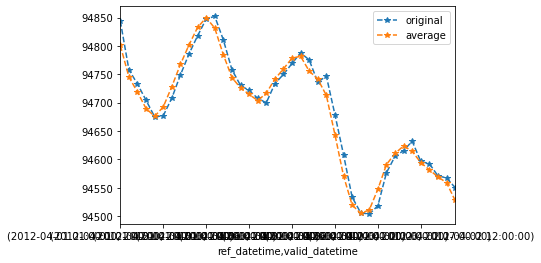

In [9]:
df['1']['VAR134'].iloc[:40].plot(linestyle='--', marker='*', label='original')
df_point['1']['VAR134'].iloc[:40].plot(linestyle='--', marker='*', label='average')
plt.legend()

In [10]:
df.loc[:,(slice(None),features_point)] = df_point

### Differentiate accumulated features

In [11]:
# Differentiate accumulated features
features_accum = ['VAR169', 'VAR175', 'VAR178', 'VAR228']
df_accum = df.loc[:,(slice(None),features_accum)]
df_accum = df_accum.diff()
df_accum[df_accum.index.levels[1].hour==1] = df.loc[df_accum.index.levels[1].hour==1,(slice(None),features_accum)]
df_accum.loc[:,(slice(None),features_accum[:3])] = df_accum.loc[:,(slice(None),features_accum[:3])]/3600 # Convert from J to Wh/h
#df.loc[:,(slice(None),features_accum)] = df_accum

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


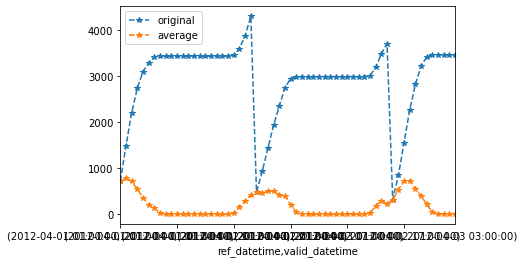

In [12]:
(df['1']['VAR169']/3600).iloc[:60].plot(linestyle='--', marker='*', label='original')
df_accum['1']['VAR169'].iloc[:60].plot(linestyle='--', marker='*', label='average')
plt.legend()

In [13]:
df.loc[:,(slice(None),features_accum)] = df_accum

### Physical features

Features to add:
* azimuth
* zenith 
* diffuse radiation
* beam radiation
* clear sky forecast
* physical forecast

#### Solar position

In [14]:
for i, (coords, alt, cap, orien, tilt) in enumerate(zip(params_json['site_coords'],
                                        params_json['site_altitude'],
                                        params_json['site_capacity'],
                                        params_json['panel_orientation'],
                                        params_json['panel_tilt'])):
    ra =  Ra(longitude=coords[0],
             latitude=coords[1],
             altitude=alt,
             capacity=cap, 
             orientation=orien,
             tilt=tilt) 
    
    df_solpos = ra.calculate_solpos(df[str(i+1)].index)
    df_clearsky = ra.calculate_clearsky(df[str(i+1)].index)
    df_power_clearsky = ra.calculate_power_clearsky(df[str(i+1)].index)
    df_weather = ra.weather_from_ghi(df.loc[:,(str(i+1),'VAR169')])
    df_power = ra.calculate_power(df_weather.copy())

    df_solpos = df_solpos.loc[:, ['zenith', 'azimuth']]
    df_clearsky.columns = df_clearsky.columns+'_clearsky'
    df_weather = df_weather.loc[:, ['dni', 'dhi', 'ghi']]

    for column in df_solpos.columns: 
        df.loc[:,(str(i+1),column)] = df_solpos.loc[:, column]
    for column in df_clearsky.columns: 
        df.loc[:,(str(i+1),column)] = df_clearsky.loc[:, column]
    for column in df_weather.columns: 
        df.loc[:,(str(i+1),column)] = df_weather.loc[:, column]
    df.loc[:,(str(i+1),'Clearsky_Forecast')] = df_power_clearsky
    df.loc[:,(str(i+1),'Physical_Forecast')] = df_power

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pvlib/modelchain.py:956: pvlibDeprecationWarning: times keyword argument is deprecated and will be removed in 0.8. The index of the weather DataFrame is used for times.
  warnings.warn('times keyword argument is deprecated and will be '


/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

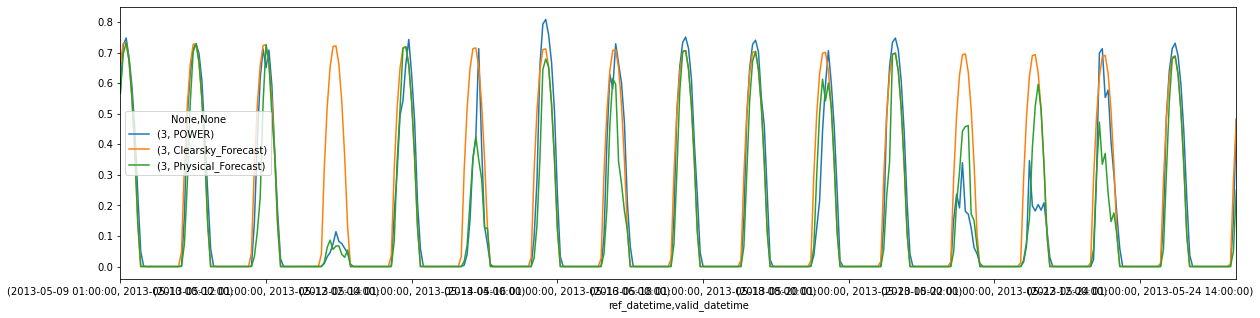

In [15]:
df.loc[(slice(None), slice('2013-05-10','2013-05-25')), ('3', ['POWER', 'Clearsky_Forecast', 'Physical_Forecast'])].plot(figsize=(20,5))

<AxesSubplot:xlabel='POWER', ylabel='Physical_Forecast'>

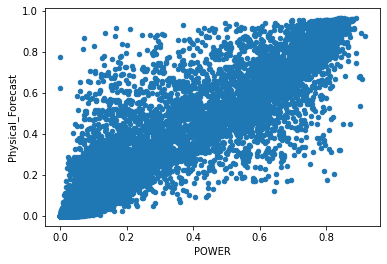

In [16]:
df['1'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

<AxesSubplot:xlabel='POWER', ylabel='Physical_Forecast'>

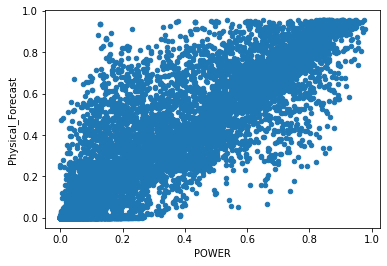

In [17]:
df['2'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

<AxesSubplot:xlabel='POWER', ylabel='Physical_Forecast'>

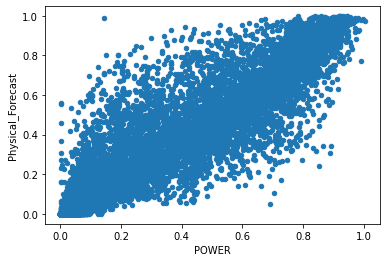

In [18]:
df['3'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

### Power difference

In [19]:
for farm in df.columns.levels[0]: 
    df.loc[:,(farm,'DIFF')] = (df.loc[:,(farm,'POWER')]-df.loc[:,(farm,'Physical_Forecast')])

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

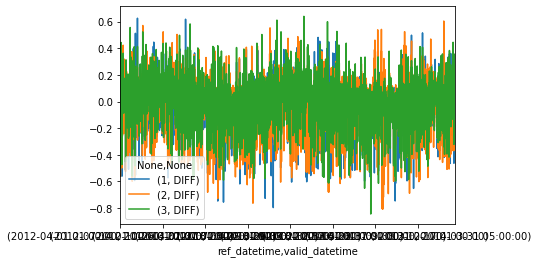

In [20]:
df.loc[:, (slice(None), 'DIFF')].plot()

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda3/envs/gbdt

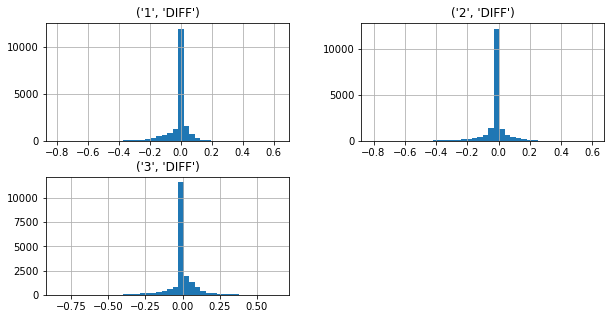

In [21]:
df.loc[:, (slice(None), 'DIFF')].hist(bins=40, figsize=(10,5));

### Add lead_time feature

In [22]:
# Add lead time feature
ref_datetime = df.index.get_level_values(0)
valid_datetime = df.index.get_level_values(1)
lead_time = (valid_datetime-ref_datetime)/pd.Timedelta('1 hour')
for farm in df.columns.levels[0]:
    df.loc[:,(farm,'LEAD_TIME')] = lead_time

In [23]:
df.loc[:,('1','LEAD_TIME')].head()

ref_datetime         valid_datetime     
2012-04-01 01:00:00  2012-04-01 01:00:00    0.0
                     2012-04-01 02:00:00    1.0
                     2012-04-01 03:00:00    2.0
                     2012-04-01 04:00:00    3.0
                     2012-04-01 05:00:00    4.0
Name: (1, LEAD_TIME), dtype: float64

### Lagged features

In [24]:
variables_lags = {'VAR169': [-1,1,2,3]}
variables_lags

{'VAR169': [-1, 1, 2, 3]}

In [25]:
for farm in df.columns.levels[0]:
    for variable, lags in variables_lags.items():
        for lag in lags:
            df.loc[:, (farm, variable+'_lag{0}'.format(lag))] = df.loc[:, (farm, variable)].shift(lag)

In [27]:
df.head()

1                          \
                                            POWER       VAR134     VAR157   
ref_datetime        valid_datetime                                          
2012-04-01 01:00:00 2012-04-01 01:00:00  0.754103  94800.78125  57.450256   
                    2012-04-01 02:00:00  0.555000  94745.37500  57.986748   
                    2012-04-01 03:00:00  0.438397  94718.43750  64.535088   
                    2012-04-01 04:00:00  0.145449  94689.53125  68.974136   
                    2012-04-01 05:00:00  0.111987  94675.96875  71.273514   

                                                                       \
                                           VAR164    VAR165    VAR166   
ref_datetime        valid_datetime                                      
2012-04-01 01:00:00 2012-04-01 01:00:00  0.350869  1.761100 -2.748185   
                    2012-04-01 02:00:00  0.614284  2.911366 -2.487933   
                    2012-04-01 03:00:00  0.868648  3.222984 -1.714293   
                    2012-04-01 04:00:00  0.955267  2.853624 -1.675272   
                    2012-04-01 05:00:00  0.793011  1.967257 -1.816462   

                                                                             \
                                             VAR167      VAR169      VAR175   
ref_datetime        valid_datetime                                            
2012-04-01 01:00:00 2012-04-01 01:00:00  295.049927  716.063889  334.036667   
                    2012-04-01 02:00:00  295.052978  771.739722  345.618056   
                    2012-04-01 03:00:00  293.858032  712.693056  342.938611   
                    2012-04-01 04:00:00  292.997192  538.536667  344.491111   
                    2012-04-01 05:00:00  292.405029  356.271389  370.243333   

                                                     ...              \
                                             VAR178  ... VAR169_lag2   
ref_datetime        valid_datetime                   ...               
2012-04-01 01:00:00 2012-04-01 01:00:00  794.943611  ...         NaN   
                    2012-04-01 02:00:00  857.661389  ...         NaN   
                    2012-04-01 03:00:00  830.499444  ...  716.063889   
                    2012-04-01 04:00:00  664.584167  ...  771.739722   
                    2012-04-01 05:00:00  492.744167  ...  712.693056   

                                                               2              \
                                        VAR169_lag3 VAR169_lag-1 VAR169_lag1   
ref_datetime        valid_datetime                                             
2012-04-01 01:00:00 2012-04-01 01:00:00         NaN   772.130833         NaN   
                    2012-04-01 02:00:00         NaN   689.866389  720.917222   
                    2012-04-01 03:00:00         NaN   517.007778  772.130833   
                    2012-04-01 04:00:00  716.063889   370.635833  689.866389   
                    2012-04-01 05:00:00  771.739722   187.457222  517.007778   

                                                                           3  \
                                        VAR169_lag2 VAR169_lag3 VAR169_lag-1   
ref_datetime        valid_datetime                                             
2012-04-01 01:00:00 2012-04-01 01:00:00         NaN         NaN   762.833056   
                    2012-04-01 02:00:00         NaN         NaN   656.017500   
                    2012-04-01 03:00:00  720.917222         NaN   529.185556   
                    2012-04-01 04:00:00  772.130833  720.917222   398.511389   
                    2012-04-01 05:00:00  689.866389  772.130833   204.666111   

                                                                             
                                        VAR169_lag1 VAR169_lag2 VAR169_lag3  
ref_datetime        valid_datetime                                           
2012-04-01 01:00:00 2012-04-01 01:00:00         NaN         NaN         NaN  
                    2012-04-01 02:00:00  7

## Normalise by clearsky power

Does not seem like a good idea to normalise with the clearsky power since the real power is quite frequently higher and can be nonzero when clearsky power is zero. 

In [46]:
for column in df.columns.levels[0]: 
    power_norm = df.loc[:, (column, 'POWER')] / df.loc[:, (column, 'Clearsky_Forecast')]
    idx_true = power_norm <= 1
    idx_false = power_norm > 1

    df.loc[idx_true, (column, 'POWER_NORM')] = power_norm
    df.loc[idx_false, (column, 'POWER_NORM')] = 1.0

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

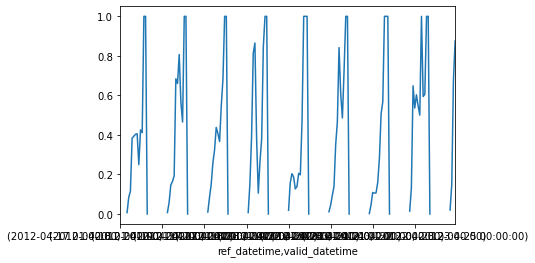

In [47]:
df['1']['POWER_NORM'].iloc[400:600].plot()

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

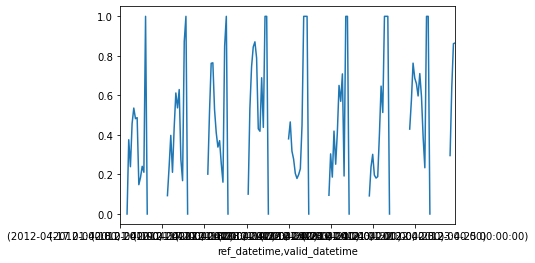

In [48]:
df['2']['POWER_NORM'].iloc[400:600].plot()

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

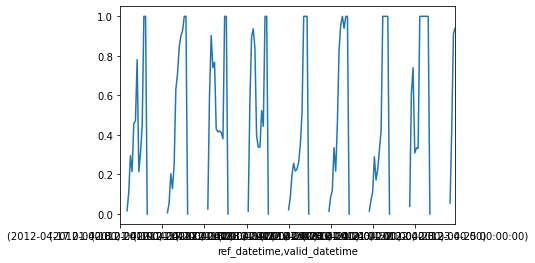

In [49]:
df['3']['POWER_NORM'].iloc[400:600].plot()